In [1]:
%reload_ext autoreload
%autoreload 2
# %matplotlib widget
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import geopandas
import os
import georasters as gr
import scipy

from geo_scripts.process_height import *
# [20:80,160:240]

/home/benjamin/.pyenv/versions/3.7.3/envs/georasters/lib/python3.7/site-packages/pysal/explore/segregation/network/network.py:16: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  "You need pandana and urbanaccess to work with segregation's network module\n"
/home/benjamin/.pyenv/versions/3.7.3/envs/georasters/lib/python3.7/site-packages/pysal/model/spvcm/abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


In [31]:
df_river = geopandas.read_file(os.path.expanduser("~/Downloads/datasets/natural_earth/ne_50m_rivers_lake_centerlines_scale_rank/ne_50m_rivers_lake_centerlines_scale_rank.shp"))
current_river = np.load("./data/river.npy")
current_desert = np.load("./data/desert.npy")
mask = np.load("./data/underwater_mask.npy")
ocean = np.load("./data/ocean_mask.npy")
stddev = np.load("./data/stddev.npy")
height = np.load("./data/height.npy")

In [7]:
raster = get_global_raster(1)
river_rasterized = rasterize_shapefile(df_river, raster)
geot = raster.geot
ag_river = aggregate_globe_with_geot(river_rasterized, geot)
m_ag = np.ma.array(ag_river, mask=mask)


In [49]:
conv = np.asarray([
    [0, 1, 0],
    [1, 0, 1],
    [0, 1, 0],
])

edges = scipy.signal.convolve2d(mask, conv, mode="same", boundary="wrap")
edges = np.ma.array(edges, mask=mask)
river = ag_river > .25

In [25]:
conv = np.asarray([
    [0, 1, 0],
    [1, 0, 1],
    [0, 1, 0],
])

lit = scipy.signal.convolve2d(ocean, conv, mode="same", boundary="wrap")
lit = np.ma.array(lit, mask=ocean)

<IPython.core.display.Javascript object>


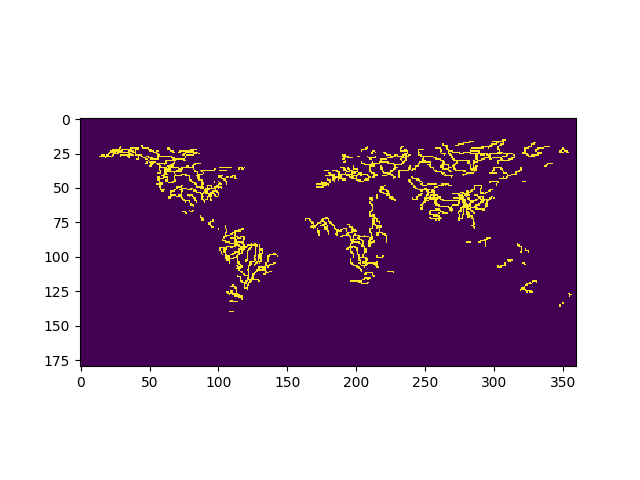

In [50]:
# ((edges >= 2) | river) & current_desert
# plt.imshow(((edges >= 1)) & current_desert)
plt.imshow(ag_river)